
# CODE TO DETECT CREDIT CARD FRAUD DETECTION USING NAIVE BAYES
# Dr. Ryan @STEMplicity
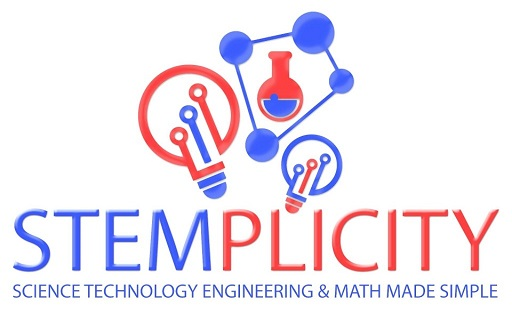



# PROBLEM STATEMENT

- Credit card companies need to have the ability to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

- Datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- The data contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 

- Input Features: V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

- Output: 1 in case of fraud and 0 otherwise.
- Link to the dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud/home


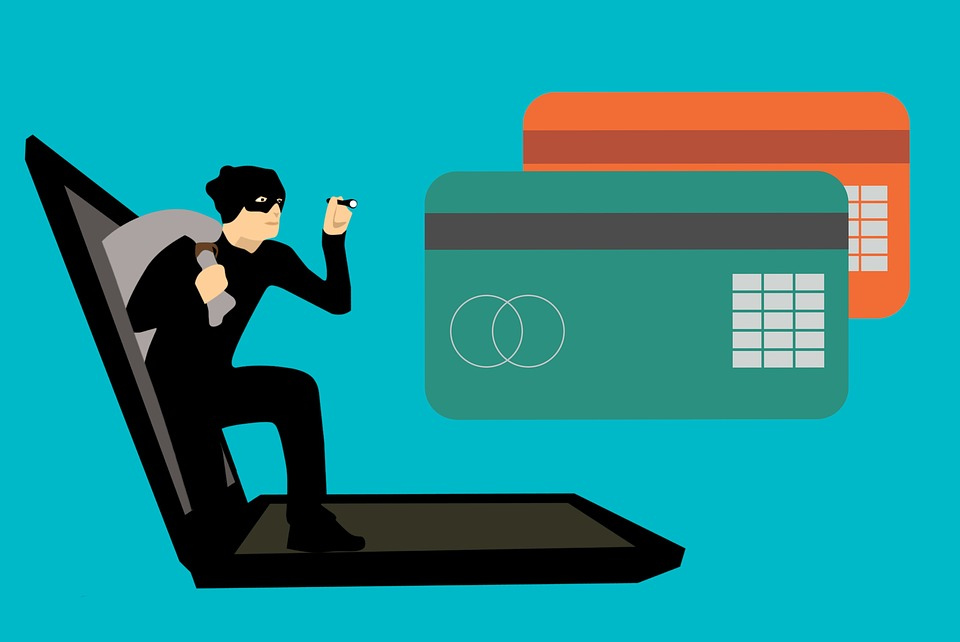

# STEP #0: LIBRARIES IMPORT


In [64]:
# import EDA libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
#from pprint import pprint

# import data cleaner and standardizer libraries
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# import ML (model, improvement and evaluation) libraries
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score, KFold

# import text-related libraries
#import re              # Simplify the reviews
#import nltk            # Classic in NLP. Allows download of stop words (irrelevant for classification), e.g.: "a", "the", "and"
#nltk.download('stopwords')
#from nltk.corpus import stopwords          # Import the downloaded stop words into the Notebook
#from nltk.stem.porter import PorterStemmer # Apply stemming on the reviews, i.e., taking "love" out of the word "loved"
#from sklearn.feature_extraction.text import CountVectorizer

# STEP #1: IMPORT DATASET

In [65]:
dataset = pd.read_csv("creditcard.csv")

In [66]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [69]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# STEP #2: VISUALIZE DATASET

In [70]:
# Subset Dataframes
fraud = dataset[dataset['Class']==1]
no_fraud = dataset[dataset['Class']==0]
print('Fraud percentage = ', round((len(fraud) / len(dataset) )*100,3),"%")
print('No Fraud percentage = ', round((len(no_fraud) / len(dataset) )*100,3),"%")

Fraud percentage =  0.173 %
No Fraud percentage =  99.827 %


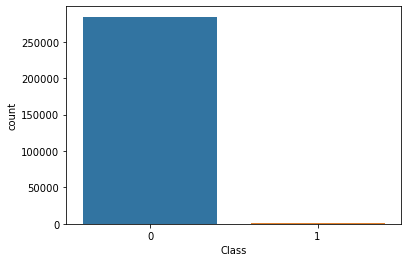

In [71]:
# Are the labels balanced? If not, either oversample the labels or use RepeatedStratifiedKFold() for model evaluation!
sns.countplot(dataset['Class'], label = "Count")
plt.show()

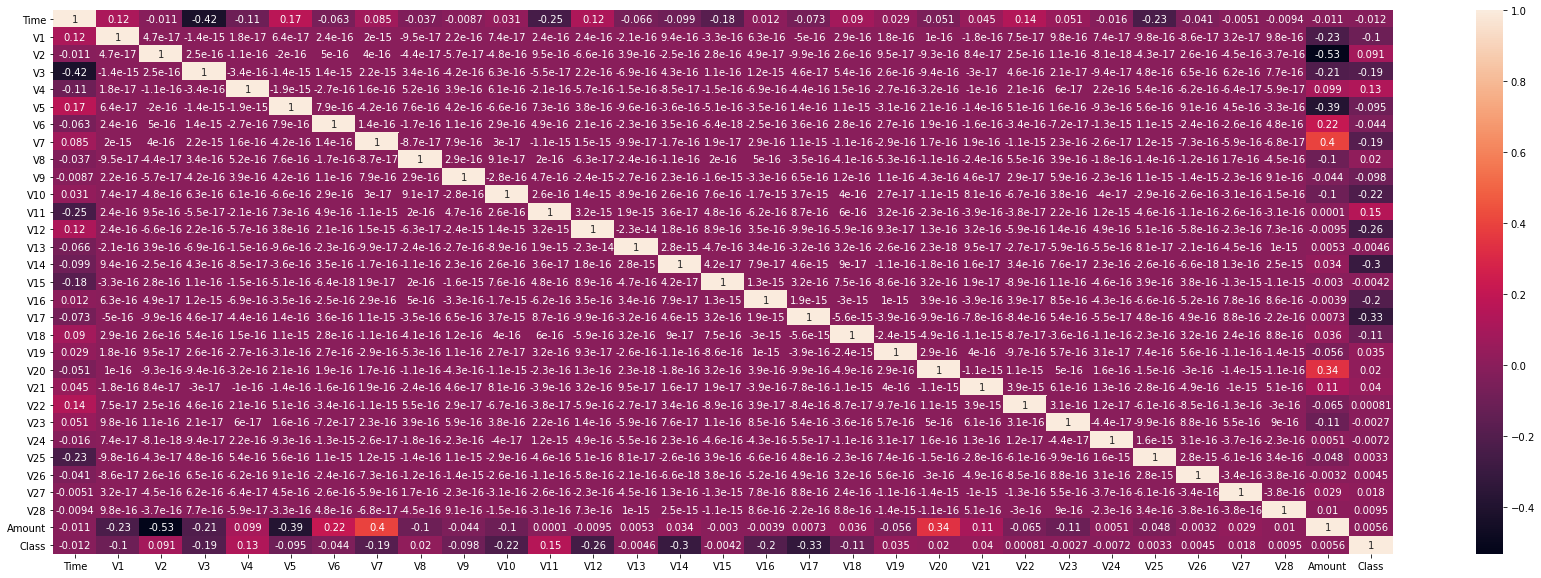

In [72]:
plt.figure(figsize=(30,10)) 
sns.heatmap(dataset.corr(), annot=True)
plt.show()
# Most of the dataset is uncorrelated, probably because the data is a result of Principal Componenet Analysis (PCA)
# Features V1 to V28 are Principal Components resulted after propagating real features through PCA. 

In [73]:
column_headers = dataset.columns.values
column_headers

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

C:\Users\Daniel.Inacio\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Daniel.Inacio\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


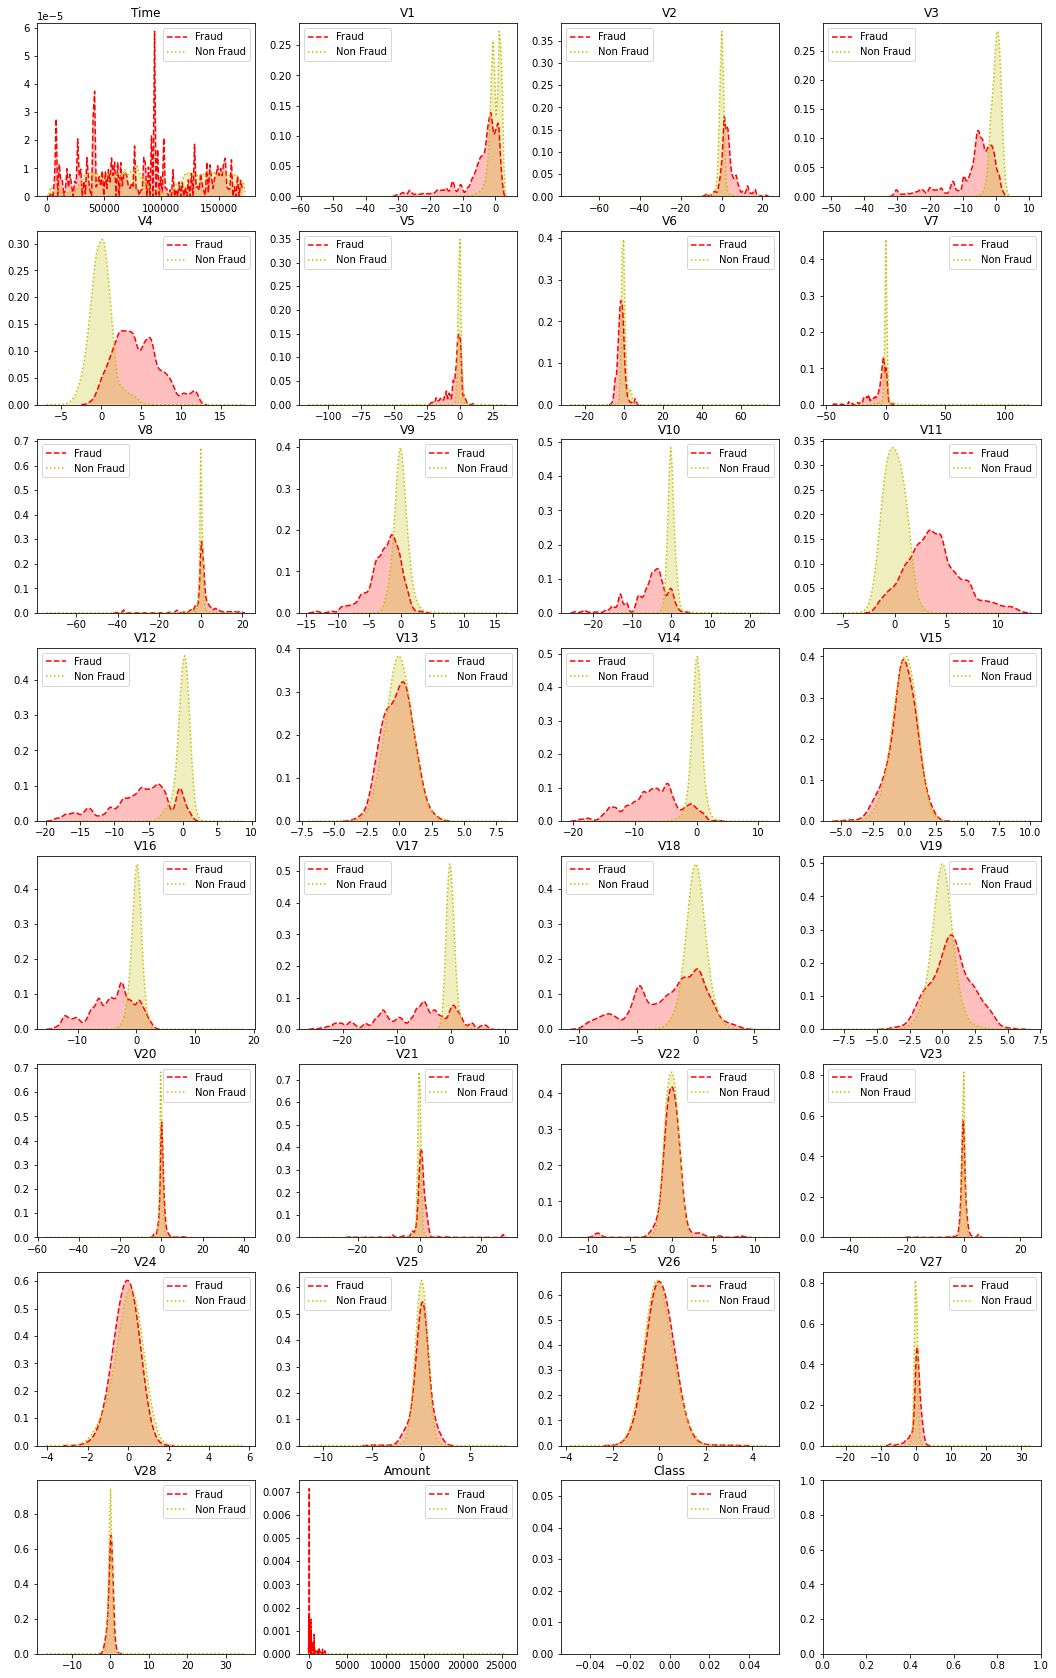

In [92]:
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
i = 1

fig, ax = plt.subplots(8,4,figsize=(18,30))
for column_header in column_headers:    
    plt.subplot(8,4,i)
    sns.kdeplot(fraud[column_header], bw = 0.4, label = "Fraud", shade=True, color="r", linestyle="--")
    sns.kdeplot(no_fraud[column_header], bw = 0.4, label = "Non Fraud", shade=True, color= "y", linestyle=":")
    plt.title(column_header, fontsize=12)
    i = i + 1
plt.show();

# Notice some of these features are very similar, almost identical, for both fraud and non_fraud

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [75]:
# Feature Scale/Normalize the 'Amount' Column
# PCA Variables are already scaled!!!
sc = StandardScaler()
dataset["Amount"] = sc.fit_transform(dataset["Amount"].values.reshape(-1, 1))

In [76]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [77]:
# Get X and y
X = dataset.drop(['Class'],axis=1)
y = dataset['Class']

In [78]:
#X
#y

In [79]:
# Divide the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


# STEP#4: TRAINING THE MODEL

In [81]:
# CANNOT USE MULTINOMIAL WHEN NEGATIVE VALUES ARE PASSED (you can use it for NLP, since you did not scale text!)
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

# STEP#5: EVALUATING THE MODEL 

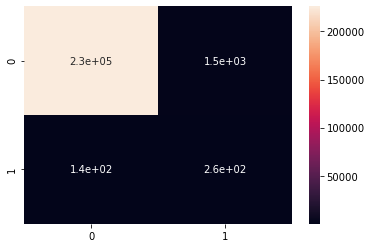

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227455
           1       0.15      0.65      0.24       390

    accuracy                           0.99    227845
   macro avg       0.57      0.82      0.62    227845
weighted avg       1.00      0.99      1.00    227845



In [82]:
# Predicting the Train set results
y_predict_train = NB_classifier.predict(X_train)

cm = confusion_matrix(y_train, y_predict_train)

sns.heatmap(cm, annot=True)
plt.show()

print(classification_report(y_train, y_predict_train))

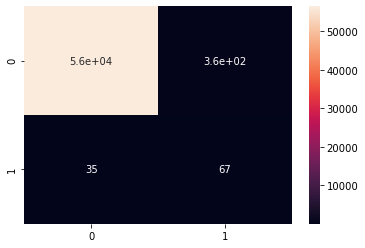

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56860
           1       0.16      0.66      0.25       102

    accuracy                           0.99     56962
   macro avg       0.58      0.83      0.62     56962
weighted avg       1.00      0.99      1.00     56962



In [83]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)

sns.heatmap(cm, annot=True)
plt.show()

print(classification_report(y_test, y_predict_test))

In [84]:
# Now, to check RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3, random_state=42)

In [85]:
# GaussianNB on Train
n_scores = cross_val_score(estimator = NB_classifier, X = X_train, y = y_train,
                           scoring='f1', cv=cv, n_jobs=-1, error_score='raise')

# (REPORT MODEL PERFORMANCE)
print('F1 Score: %.4F (%.4F)' % (np.mean(n_scores), np.std(n_scores)))

F1 Score: 0.2417 (0.0348)


In [86]:
# Gaussian on Test
n_scores = cross_val_score(estimator = NB_classifier, X = X_test, y = y_test,
                           scoring='f1', cv=cv, n_jobs=-1, error_score='raise')

# (REPORT MODEL PERFORMANCE)
print('F1 Score: %.4F (%.4F)' % (np.mean(n_scores), np.std(n_scores)))

F1 Score: 0.2588 (0.0584)


## SMOTE Tehcnique to handle lack of samples

In [93]:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [87]:
# RepeatedStratifiedKFold TRIES to balance the samples,
# but we have too little data for this cross validation method to balance it!
# Let's test the same, with SMOTE, an oversampling minority technique

oversample = SMOTE(sampling_strategy=0.1)
X, y = oversample.fit_resample(X, y)
undersample = RandomUnderSampler(sampling_strategy=0.5)
X, y = undersample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2)
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_predict_train = NB_classifier.predict(X_train)
y_predict_test = NB_classifier.predict(X_test)

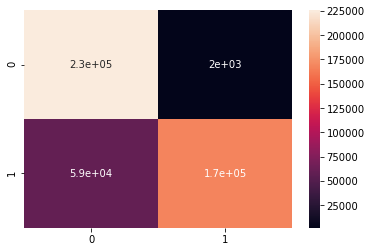

              precision    recall  f1-score   support

           0       0.79      0.99      0.88    227538
           1       0.99      0.74      0.85    227366

    accuracy                           0.87    454904
   macro avg       0.89      0.86      0.86    454904
weighted avg       0.89      0.87      0.86    454904



In [88]:
cm = confusion_matrix(y_train, y_predict_train)

sns.heatmap(cm, annot=True)
plt.show()

print(classification_report(y_train, y_predict_train))

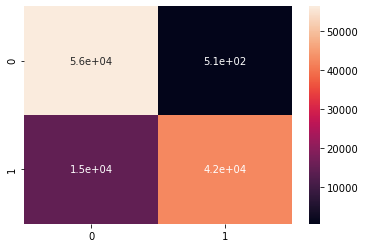

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     56777
           1       0.99      0.74      0.85     56949

    accuracy                           0.87    113726
   macro avg       0.89      0.87      0.87    113726
weighted avg       0.89      0.87      0.86    113726



In [89]:
cm = confusion_matrix(y_test, y_predict_test)

sns.heatmap(cm, annot=True)
plt.show()

print(classification_report(y_test, y_predict_test))

In [90]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# GaussianNB on Train
n_scores = cross_val_score(estimator = NB_classifier, X = X_train, y = y_train,
                           scoring='f1', cv=cv_KFold, n_jobs=-1, error_score='raise')

# (REPORT MODEL PERFORMANCE)
print('F1 Score: %.4F (%.4F)' % (np.mean(n_scores), np.std(n_scores)))

# Gaussian on Test
n_scores = cross_val_score(estimator = NB_classifier, X = X_test, y = y_test,
                           scoring='f1', cv=cv_KFold, n_jobs=-1, error_score='raise')

# (REPORT MODEL PERFORMANCE)
print('F1 Score: %.4F (%.4F)' % (np.mean(n_scores), np.std(n_scores)))

F1 Score: 0.8450 (0.0018)
F1 Score: 0.8493 (0.0040)


# STEP#6: IMPROVING THE MODEL 

In [100]:
# Data is already scaled
# No encoding required
# Naive Bayes has no hyperparameters to tune with grid search
# At this point, we can only remove features...

# Drop similar features columns
# Looking at the KDE Plot, we can drop V15, V22, V24, V25, V26

#X = dataset.drop(['V15','V22','V24','V25','V26','Class'], axis = 1)
X = dataset.drop(['Time','V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28','Class'], axis = 1)

y = dataset['Class']

In [101]:
# Train the classifier again!
oversample = SMOTE(sampling_strategy=0.1)
X, y = oversample.fit_resample(X, y)
undersample = RandomUnderSampler(sampling_strategy=0.5)
X, y = undersample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2)
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_predict_train = NB_classifier.predict(X_train)
y_predict_test = NB_classifier.predict(X_test)

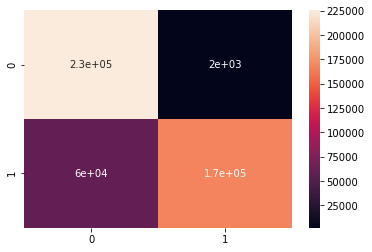

              precision    recall  f1-score   support

           0       0.79      0.99      0.88    227477
           1       0.99      0.74      0.85    227427

    accuracy                           0.86    454904
   macro avg       0.89      0.86      0.86    454904
weighted avg       0.89      0.86      0.86    454904



In [102]:
cm = confusion_matrix(y_train, y_predict_train)

sns.heatmap(cm, annot=True)
plt.show()

print(classification_report(y_train, y_predict_train))

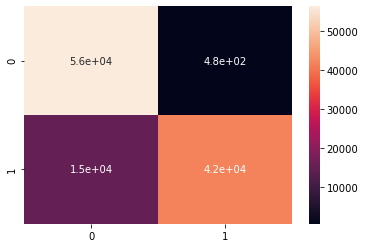

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     56838
           1       0.99      0.74      0.84     56888

    accuracy                           0.86    113726
   macro avg       0.89      0.86      0.86    113726
weighted avg       0.89      0.86      0.86    113726



In [103]:
cm = confusion_matrix(y_test, y_predict_test)

sns.heatmap(cm, annot=True)
plt.show()

print(classification_report(y_test, y_predict_test))

# Precision = True Positive results, out of all positive results returned, a.k.a., accuracy
# Recall = True Positive results, out of true positive and false negatives, a.k.a, prediction ability

In [104]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# GaussianNB on Train
n_scores = cross_val_score(estimator = NB_classifier, X = X_train, y = y_train,
                           scoring='f1', cv=cv_KFold, n_jobs=-1, error_score='raise')

# (REPORT MODEL PERFORMANCE)
print('F1 Score: %.4F (%.4F)' % (np.mean(n_scores), np.std(n_scores)))

# Gaussian on Test
n_scores = cross_val_score(estimator = NB_classifier, X = X_test, y = y_test,
                           scoring='f1', cv=cv_KFold, n_jobs=-1, error_score='raise')

# (REPORT MODEL PERFORMANCE)
print('F1 Score: %.4F (%.4F)' % (np.mean(n_scores), np.std(n_scores)))

F1 Score: 0.8454 (0.0024)
F1 Score: 0.8470 (0.0026)


In [105]:
print("Number of fraud points in the testing dataset = ", sum(y_test))

Number of fraud points in the testing dataset =  56888


In [ ]:
# All values consider a  dataset that passed through SMOTE, to ensure a decently-built model
# Before removing features
# F1 Score: 0.8450 (0.0018)
# F1 Score: 0.8493 (0.0040)

# After removing V15, V22, V24, V25, V26
# F1 Score: 0.8459 (0.0018)
# F1 Score: 0.8455 (0.0043)

# After removing 'Time','V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28'
# F1 Score: 0.8454 (0.0024)
# F1 Score: 0.8470 (0.0026)

In [ ]:
# So far, it seems after balancing our dataset, removing features does not have much of an effect...

# At this point, the next step would be to do the same study with other classification models.
# Also, our dataset is already big enough that may even justify Deep Learning!

# EXCELLENT JOB! NOW YOU BECAME FAMILIAR WITH NAIVE BAYES, GREAT JOB!